# Case Study - Electricity Data
## Learning goals: 
 - Data Preprocessing: Outlier Detection
 
 For this lab, we will work on a dataset of electricity from Belgium. 

### Import Required modules

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [99]:
elct_df = pd.read_csv('Cleaned Electricity Data 2017.csv')
elct_df.head()

,Date,time,Consumption,Month,Day,Year,Weekday,Hour,Min,HourMin
0,12/1/2017,0:00:00,72650.0,12,1,2017,Thu,0,0,0:00
1,12/1/2017,0:30:00,70553.0,12,1,2017,Thu,0,30,0:30
2,12/1/2017,1:00:00,68277.0,12,1,2017,Thu,1,0,1:00
3,12/1/2017,1:30:00,67611.0,12,1,2017,Thu,1,30,1:30
4,12/1/2017,2:00:00,67388.0,12,1,2017,Thu,2,0,2:00


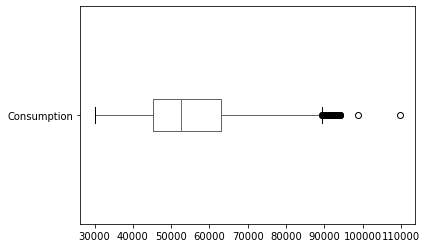

In [100]:
# Box plot
elct_df.Consumption.plot(kind='box',vert=False)

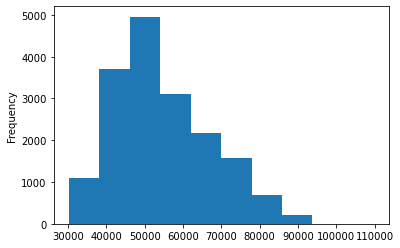

In [101]:
# Histogram
elct_df.Consumption.plot(kind='hist')

In [102]:
# +-3sigma
mu = elct_df.Consumption.mean()
sd = elct_df.Consumption.std()

print('Upper: {}'.format(mu+3*sd))
print('Lower: {}'.format(mu-3*sd))

Upper: 91973.96481350262
Lower: 17204.795460469984


In [103]:
BM = (elct_df.Consumption< 17204) | (elct_df.Consumption> 91973)
elct_df[BM]

,Date,time,Consumption,Month,Day,Year,Weekday,Hour,Min,HourMin
2102,1/13/2017,19:00:00,109670.0,1,13,2017,Thu,19,0,19:00
2320,1/18/2017,8:00:00,92213.0,1,18,2017,Tue,8,0,8:00
2321,1/18/2017,8:30:00,92856.0,1,18,2017,Tue,8,30,8:30
2322,1/18/2017,9:00:00,92841.0,1,18,2017,Tue,9,0,9:00
2323,1/18/2017,9:30:00,93075.0,1,18,2017,Tue,9,30,9:30
2324,1/18/2017,10:00:00,92751.0,1,18,2017,Tue,10,0,10:00
2325,1/18/2017,10:30:00,92147.0,1,18,2017,Tue,10,30,10:30
2342,1/18/2017,19:00:00,93910.0,1,18,2017,Tue,19,0,19:00
2343,1/18/2017,19:30:00,92974.0,1,18,2017,Tue,19,30,19:30
2367,1/19/2017,7:30:00,92123.0,1,19,2017,Wed,7,30,7:30


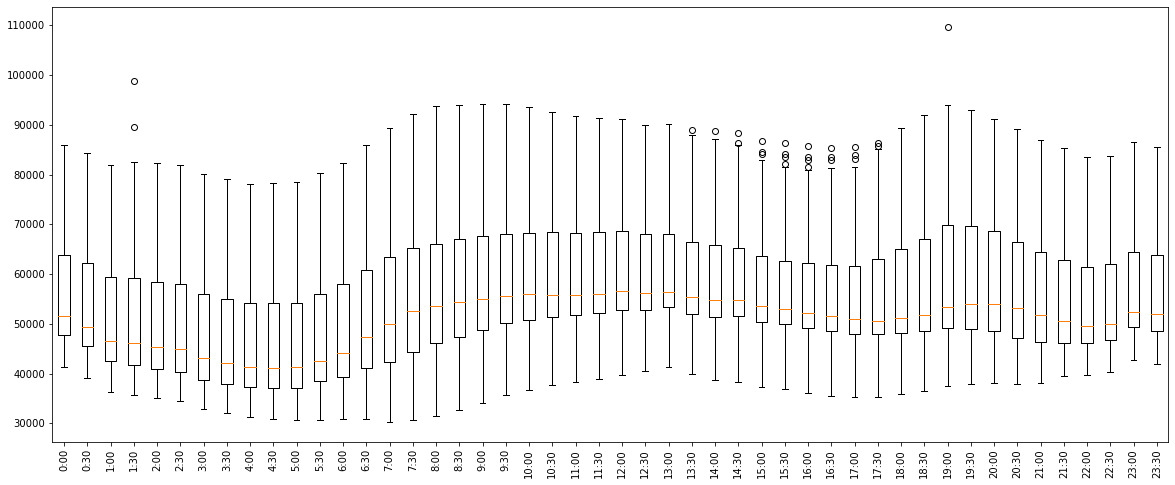

In [104]:
# Multivariate

PossibleTimes = elct_df.time.unique()

SS = pd.Series('', index = PossibleTimes)
Xlables = elct_df.iloc[:48].HourMin


for time in PossibleTimes:
    BM = elct_df.time == time
    SS[time] = elct_df[BM].Consumption

plt.figure(figsize=(20,8))
plt.boxplot(SS)
plt.xticks(range(1,49),Xlables,rotation=90)
plt.show()

In [107]:
SS.loc['0:00:00']

0        72650.0
48       74079.0
96       74892.0
144      71701.0
192      71686.0
          ...   
17280    63868.0
17328    65232.0
17376    68165.0
17424    69411.0
17472    71389.0
Name: Consumption, Length: 365, dtype: float64

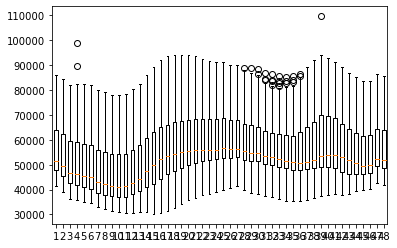

In [105]:
# extract important numbers from boxplot
output = plt.boxplot(SS)

In [70]:
output

{'whiskers': [<matplotlib.lines.Line2D at 0x2ff979b9df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ff979d5550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ff979b9a90>,
 'medians': [<matplotlib.lines.Line2D at 0x2ff979d5c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ff979d5ee0>,
 'means': []}

In [71]:
for item in output['whiskers']:
    print(item.get_ydata())

[47820. 41282.]
[63868. 85893.]
[45477. 39136.]
[62150. 84349.]
[42482. 36330.]
[59418. 81895.]
[41636. 35770.]
[59232. 82580.]
[40917. 35081.]
[58456. 82272.]
[40282. 34460.]
[57906. 81912.]
[38714. 32910.]
[56056. 80162.]
[37952. 32096.]
[55035. 79042.]
[37315. 31336.]
[54220. 78138.]
[37073. 30828.]
[54217. 78200.]
[37157. 30624.]
[54207. 78558.]
[38399. 30707.]
[56020. 80390.]
[39242. 30889.]
[58012. 82347.]
[41122. 30797.]
[60712. 85911.]
[42349. 30199.]
[63326. 89307.]
[44381. 30672.]
[65145. 92123.]
[46105. 31497.]
[66081. 93853.]
[47437. 32736.]
[67025. 94040.]
[48815. 34057.]
[67636. 94190.]
[50060. 35593.]
[68101. 94088.]
[50671. 36663.]
[68233. 93491.]
[51363. 37740.]
[68395. 92590.]
[51775. 38266.]
[68258. 91771.]
[52142. 38995.]
[68490. 91389.]
[52798. 39691.]
[68741. 91081.]
[52831. 40588.]
[67968. 89915.]
[53274. 41348.]
[68009. 90064.]
[51948. 39883.]
[66537. 87944.]
[51332. 38660.]
[65840. 87050.]
[51485. 38234.]
[65281. 85919.]
[50408. 37277.]
[63538. 82825.]
[49911. 

In [72]:
for item in output['fliers']:
    print(item.get_ydata())

[]
[]
[]
[89507. 98900.]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[88919.]
[88820.]
[86392. 88347.]
[84539. 84200. 86776.]
[84068. 83472. 82082. 86272.]
[83611. 82921. 81613. 85756.]
[83608. 82846. 85429.]
[83889. 83213. 85446.]
[85664. 86272.]
[]
[]
[109670.]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [73]:
Fliers = {}
for i,item in enumerate(output['fliers']):
    Fliers[Xlables[i]] = item.get_ydata()
Fliers

{'0:00': array([], dtype=float64),
 '0:30': array([], dtype=float64),
 '1:00': array([], dtype=float64),
 '1:30': array([89507., 98900.]),
 '2:00': array([], dtype=float64),
 '2:30': array([], dtype=float64),
 '3:00': array([], dtype=float64),
 '3:30': array([], dtype=float64),
 '4:00': array([], dtype=float64),
 '4:30': array([], dtype=float64),
 '5:00': array([], dtype=float64),
 '5:30': array([], dtype=float64),
 '6:00': array([], dtype=float64),
 '6:30': array([], dtype=float64),
 '7:00': array([], dtype=float64),
 '7:30': array([], dtype=float64),
 '8:00': array([], dtype=float64),
 '8:30': array([], dtype=float64),
 '9:00': array([], dtype=float64),
 '9:30': array([], dtype=float64),
 '10:00': array([], dtype=float64),
 '10:30': array([], dtype=float64),
 '11:00': array([], dtype=float64),
 '11:30': array([], dtype=float64),
 '12:00': array([], dtype=float64),
 '12:30': array([], dtype=float64),
 '13:00': array([], dtype=float64),
 '13:30': array([88919.]),
 '14:00': array([88820

In [74]:
def FlierDetector(r):
    fliers_array = Fliers[r.HourMin]
    if(fliers_array.size==0):
        return False
    elif(r.Consumption in fliers_array):
        return True
    else:
        return False

In [75]:
BM = elct_df.apply(FlierDetector,axis=1)
flier_df = elct_df[BM]
flier_df


,Date,time,Consumption,Month,Day,Year,Weekday,Hour,Min,HourMin
2102,1/13/2017,19:00:00,109670.0,1,13,2017,Thu,19,0,19:00
2333,1/18/2017,14:30:00,86392.0,1,18,2017,Tue,14,30,14:30
2334,1/18/2017,15:00:00,84539.0,1,18,2017,Tue,15,0,15:00
2335,1/18/2017,15:30:00,84068.0,1,18,2017,Tue,15,30,15:30
2336,1/18/2017,16:00:00,83611.0,1,18,2017,Tue,16,0,16:00
2337,1/18/2017,16:30:00,83608.0,1,18,2017,Tue,16,30,16:30
2338,1/18/2017,17:00:00,83889.0,1,18,2017,Tue,17,0,17:00
2339,1/18/2017,17:30:00,85664.0,1,18,2017,Tue,17,30,17:30
2382,1/19/2017,15:00:00,84200.0,1,19,2017,Wed,15,0,15:00
2383,1/19/2017,15:30:00,83472.0,1,19,2017,Wed,15,30,15:30


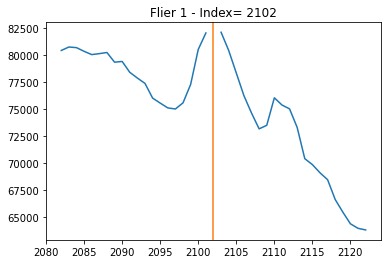

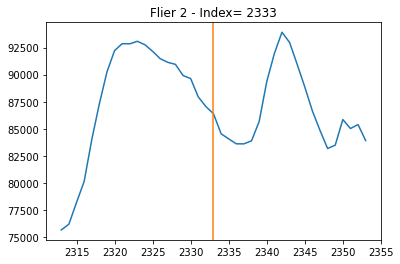

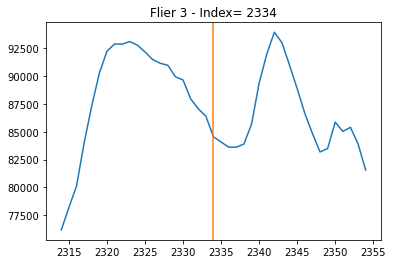

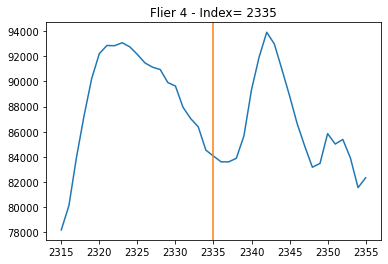

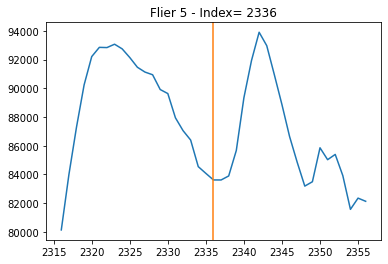

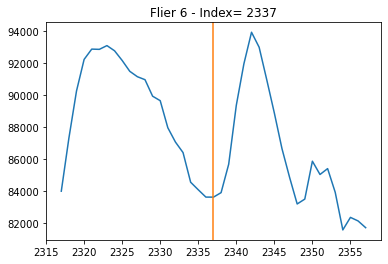

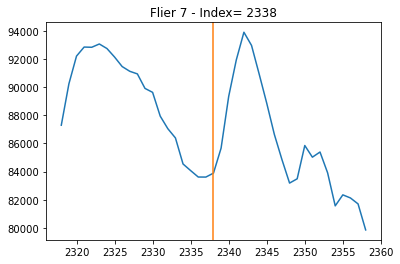

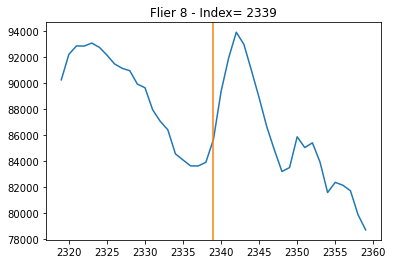

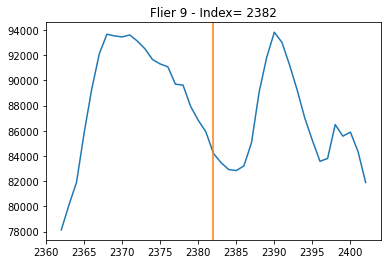

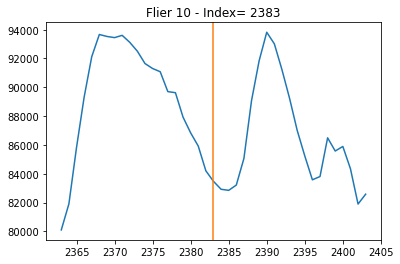

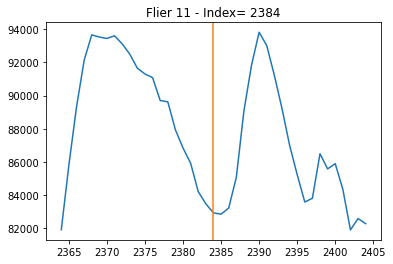

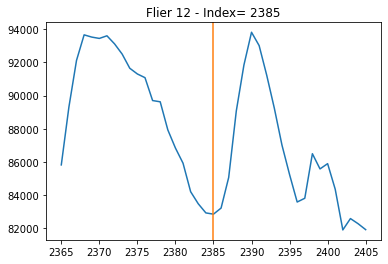

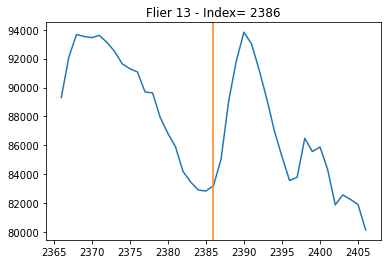

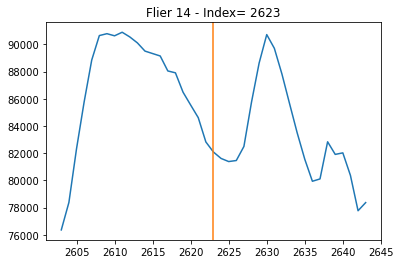

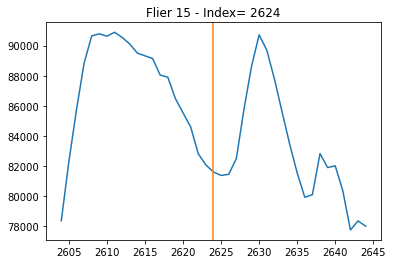

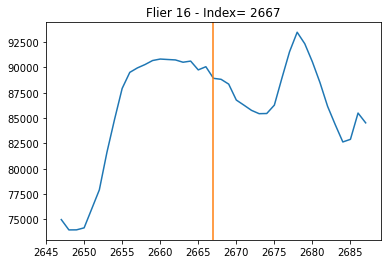

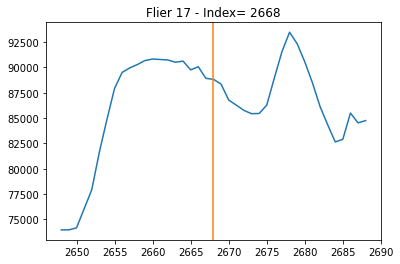

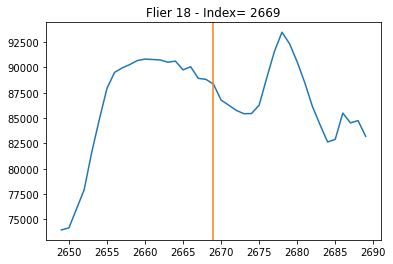

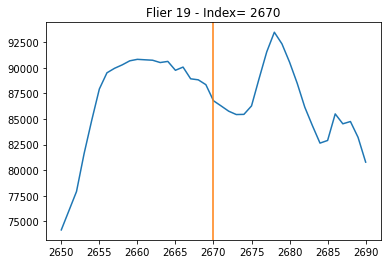

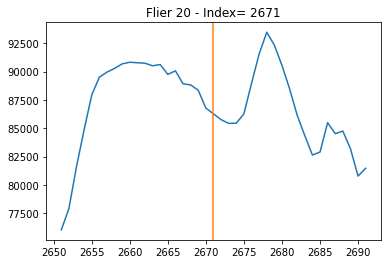

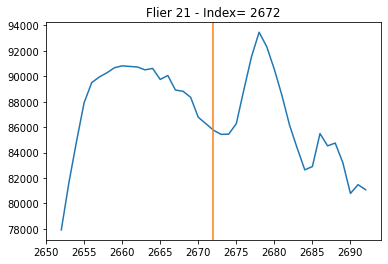

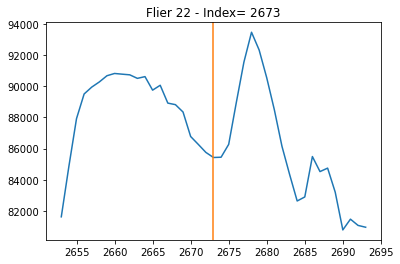

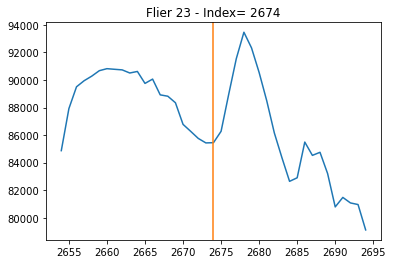

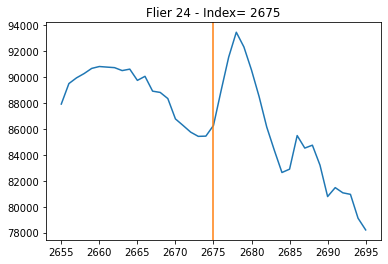

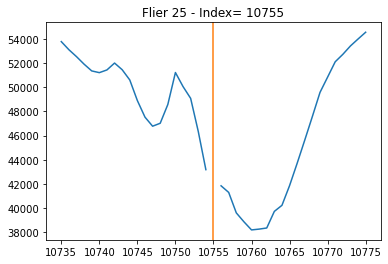

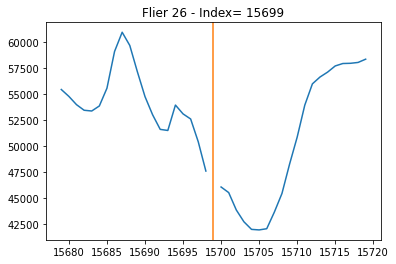

In [90]:
index = 0
for i,row in flier_df.iterrows():
    index = index +1
    plt.plot(elct_df.Consumption.loc[i-20:i+20])
    plt.title('Flier ' + str(index) + ' - Index= ' + str(i))
    plt.axvline(i,c='C1')
    plt.show()

Altogether there are three outliers: [2102, 10755,15699]

In [89]:
outlier_index = [2102, 10755,15699]

for i in outlier_index:
    elct_df.at[i,'Consumption'] = np.nan


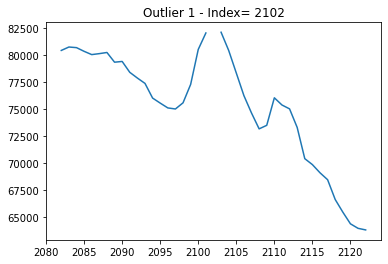

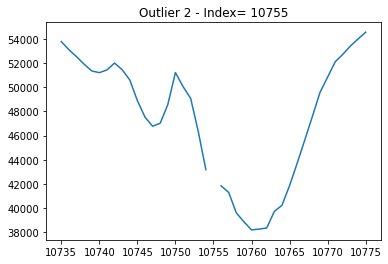

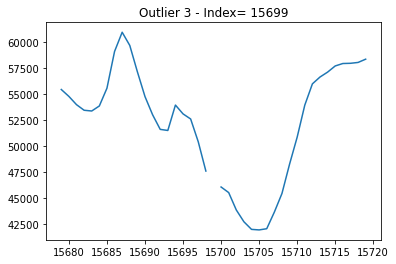

In [91]:
index = 0
for i in outlier_index:
    index = index +1
    plt.plot(elct_df.Consumption.loc[i-20:i+20])
    plt.title('Outlier ' + str(index) + ' - Index= ' + str(i))
    plt.show()

In [92]:
def MissingValueReprots(df):
    print('The number of rows:', len(df))

    print('The number of Missing Values:', df.Consumption.isnull().astype(int).sum())

In [93]:
MissingValueReprots(elct_df)

The number of rows: 17520
The number of Missing Values: 3


In [94]:
elct_df.Consumption = elct_df.Consumption.interpolate(method='linear')

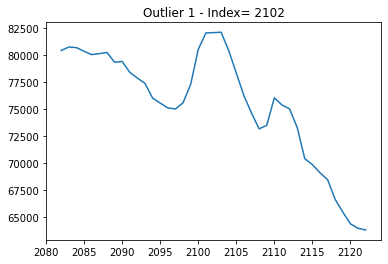

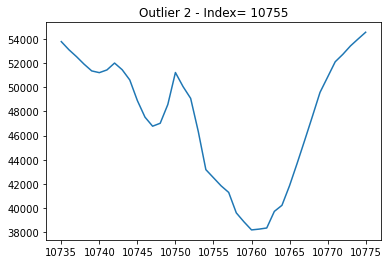

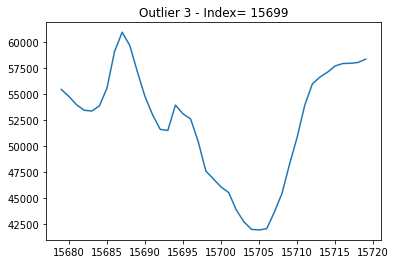

In [95]:
index = 0
for i in outlier_index:
    index = index +1
    plt.plot(elct_df.Consumption.loc[i-20:i+20])
    plt.title('Outlier ' + str(index) + ' - Index= ' + str(i))
    plt.show()

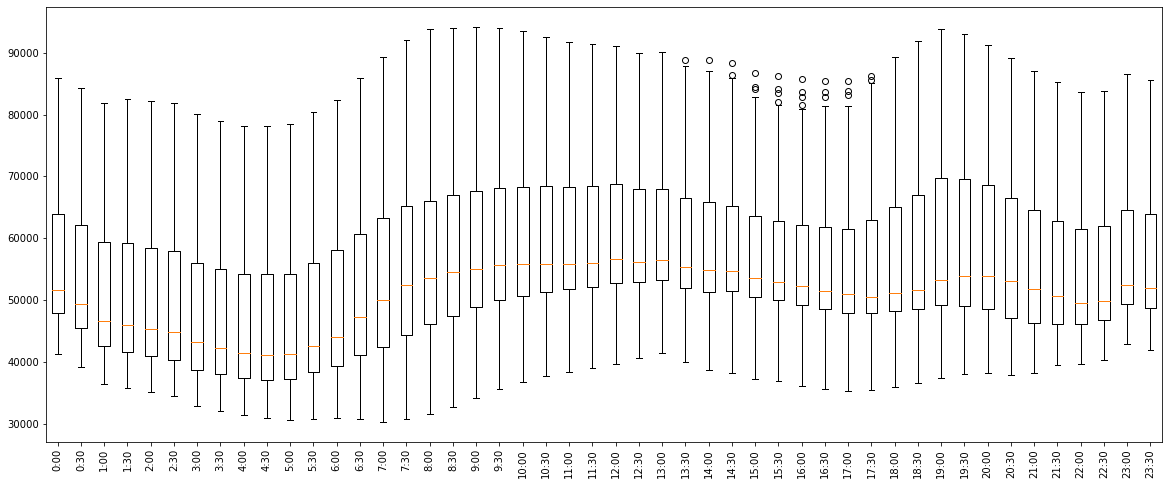

In [96]:
PossibleTimes = elct_df.time.unique()

SS = pd.Series('', index = PossibleTimes)
Xlables = elct_df.iloc[:48].HourMin


for time in PossibleTimes:
    BM = elct_df.time == time
    SS[time] = elct_df[BM].Consumption

plt.figure(figsize=(20,8))
plt.boxplot(SS)
plt.xticks(range(1,49),Xlables,rotation=90)
plt.show()

In [97]:
elct_df.to_csv('Cleaned_v2 Electricity Data 2017.csv',index=False)